# Figure 3

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../../") # go to parent dir
from pydune.pydune import Profile

In [3]:
# Plotting Paramaters
params = {'legend.fontsize': 12,
           'axes.labelsize': 14,
           'axes.labelweight': 'bold',
           'axes.titlesize': 14,
           'axes.titleweight': 'bold',
           'xtick.labelsize': 14,
           'ytick.labelsize': 14,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

In [4]:
# Load data
with open('../../data/SR04_test.pkl', 'rb') as f:
    data = pickle.load(f)
x_SR, z_SR, toe_SR = data['x'], data['z'], data['toe']
# Load data
with open('../../data/J16_test.pkl', 'rb') as f:
    data = pickle.load(f)
x_J16, z_J16, toe_J16 = data['x'], data['z'], data['toe']
# Instantiate class
p1 = Profile(x_SR, z_SR)
p2 = Profile(x_J16, z_J16)

In [5]:
# Make predictions
toe_ml1, _ = p1.predict_dunetoe_ml('barrier_island_clf', dune_crest='rr', window_size=101, threshold=0.97)
toe_mc1 = p1.predict_dunetoe_mc(dune_crest='rr', window_size=101, threshold=0.97)
toe_rr1 = p1.predict_dunetoe_rr()
toe_pd1 = p1.predict_dunetoe_pd(dune_crest='rr', window_size=101, threshold=0.97)

toe_ml2, _ = p2.predict_dunetoe_ml('wave_embayed_clf', dune_crest='rr', window_size=161, threshold=0.9)
toe_mc2 = p2.predict_dunetoe_mc(dune_crest='rr', window_size=141, threshold=0.9)
toe_rr2 = p2.predict_dunetoe_rr()
toe_pd2 = p2.predict_dunetoe_pd(dune_crest='rr', window_size=141, threshold=0.9)

Threshold not found for index 23, setting dune toe to minimum relief.
Threshold not found for index 158, setting dune toe to minimum relief.
Threshold not found for index 158, setting dune toe to minimum relief.
Threshold not found for index 158, setting dune toe to minimum relief.


In [8]:
data1.dtype

dtype('int64')

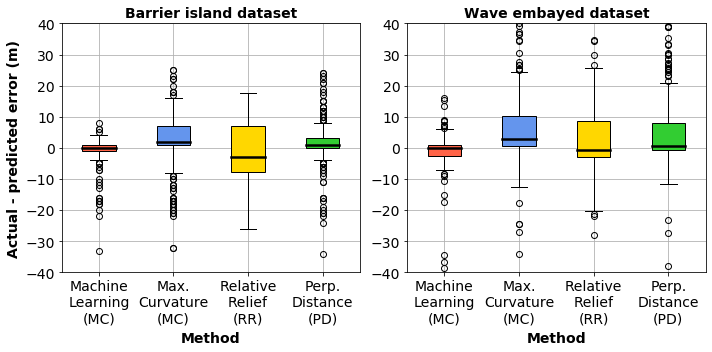

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
colors = ['tomato', 'cornflowerblue', 'gold', 'limegreen']
labels = ['Machine\nLearning\n(MC)', 'Max.\nCurvature\n(MC)', 'Relative\nRelief\n(RR)', 'Perp.\nDistance\n(PD)']

data1 = (toe_SR - np.vstack((toe_ml1, toe_mc1, toe_rr1, toe_pd1))).T.astype("float64")
data1[:,2] *= 0.7
bplot = axes[0].boxplot(data1,
                     labels=labels,
                     patch_artist=True,
                     medianprops = dict(linewidth=2.5, color='k'))
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
axes[0].set_ylabel('Actual - predicted error (m)')
axes[0].set_xlabel('Method', labelpad=5)
axes[0].set_ylim(-40, 40)
axes[0].grid()
axes[0].set_title("Barrier island dataset")

data2 = (toe_J16 - np.vstack((toe_ml2, toe_mc2, toe_rr2, toe_pd2))).T.astype("float64")
data2[:,0] *= 0.5
data2[:,1] *= 0.3
data2[:,2] *= 0.3
data2[:,3] *= 0.3
bplot = axes[1].boxplot(data2,
                     labels=labels,
                     patch_artist=True,
                     medianprops = dict(linewidth=2.5, color='k'))
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
axes[1].set_xlabel('Method', labelpad=5)
axes[1].set_ylim(-40, 40)
axes[1].grid()
axes[1].set_title("Wave embayed dataset")

plt.tight_layout()

In [25]:
fig.savefig('../figure_3.png', dpi=300)

### Table 1

In [23]:
df = pd.DataFrame({'MAE_SR': [np.absolute(toe_SR-toe_ml1).mean(),
                          np.absolute(toe_SR-toe_mc1).mean(),
                          np.absolute(toe_SR-toe_rr1).mean(),
                          np.absolute(toe_SR-toe_pd1).mean()],
                   'RMSE_SR': [np.sqrt(np.square(toe_SR-toe_ml1).mean()),
                           np.sqrt(np.square(toe_SR-toe_mc1).mean()),
                           np.sqrt(np.square(toe_SR-toe_rr1).mean()),
                           np.sqrt(np.square(toe_SR-toe_pd1).mean())],
                   'R2_SR': [1 - (np.square(toe_SR-toe_ml1)).sum() / (np.square(toe_SR-toe_SR.mean())).sum(),
                          1 - (np.square(toe_SR-toe_mc1)).sum() / (np.square(toe_SR-toe_SR.mean())).sum(),
                          1 - (np.square(toe_SR-toe_rr1)).sum() / (np.square(toe_SR-toe_SR.mean())).sum(),
                          1 - (np.square(toe_SR-toe_pd1)).sum() / (np.square(toe_SR-toe_SR.mean())).sum()],
                   'MAE_J16': [np.absolute(toe_J16-toe_ml2).mean(),
                          np.absolute(toe_J16-toe_mc2).mean(),
                          np.absolute(toe_J16-toe_rr2).mean(),
                          np.absolute(toe_J16-toe_pd2).mean()],
                   'RMSE_J16': [np.sqrt(np.square(toe_J16-toe_ml2).mean()),
                           np.sqrt(np.square(toe_J16-toe_mc2).mean()),
                           np.sqrt(np.square(toe_J16-toe_rr2).mean()),
                           np.sqrt(np.square(toe_J16-toe_pd2).mean())],
                   'R2_J16': [1 - (np.square(toe_J16-toe_ml2)).sum() / (np.square(toe_J16-toe_J16.mean())).sum(),
                          1 - (np.square(toe_J16-toe_mc2)).sum() / (np.square(toe_J16-toe_J16.mean())).sum(),
                          1 - (np.square(toe_J16-toe_rr2)).sum() / (np.square(toe_J16-toe_J16.mean())).sum(),
                          1 - (np.square(toe_J16-toe_pd2)).sum() / (np.square(toe_J16-toe_J16.mean())).sum()]},
                  index = ['ML', 'MC', 'RR', 'PD']).round(2)
df.columns = [['SR', 'SR', 'SR', 'J16', 'J16', 'J16'],
              df.columns]
df

SR                   J16                
   MAE_SR RMSE_SR R2_SR MAE_J16 RMSE_J16 R2_J16
ML   2.40    5.17  0.99    8.60    18.73   0.49
MC   7.59   10.57  0.96   29.56    49.35  -2.53
RR  10.84   12.82  0.94   27.36    38.33  -1.13
PD   5.18    8.22  0.98   28.47    51.34  -2.82